In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from word2number import w2n
%matplotlib inline

# 1. Reading and Understanding The Data

In [2]:
# Importing Excel File And Storing That Data In DataFrame
df = pd.read_excel(r'C:\Users\Manoj Kumar\Desktop\Linear Regression Data\Car Price Pridiction.xlsx')

In [3]:
# Total Rows & Columns In Data Set
df.shape

(205, 26)

In [4]:
# Understanding The Structure Of Data
df.head()

,Car_ID,Symboling,CarName,Fueltype,Aspiration,Doornumber,Carbody,Drivewheel,Enginelocation,Wheelbase,...,Enginesize,Fuelsystem,Boreratio,Stroke,Compressionratio,Horsepower,Peakrpm,Citympg,Highwaympg,Price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100 ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# Checking For Null Values
df.isnull().sum()

Car_ID              0
Symboling           0
CarName             0
Fueltype            0
Aspiration          0
Doornumber          0
Carbody             0
Drivewheel          0
Enginelocation      0
Wheelbase           0
Carlength           0
Carwidth            0
Carheight           0
Curbweight          0
Enginetype          0
Cylindernumber      0
Enginesize          0
Fuelsystem          0
Boreratio           0
Stroke              0
Compressionratio    0
Horsepower          0
Peakrpm             0
Citympg             0
Highwaympg          0
Price               0
dtype: int64

In [6]:
# Getting The Information About The Data Set i.e. Data Type, Non-Null Values For Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_ID            205 non-null    int64  
 1   Symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   Fueltype          205 non-null    object 
 4   Aspiration        205 non-null    object 
 5   Doornumber        205 non-null    object 
 6   Carbody           205 non-null    object 
 7   Drivewheel        205 non-null    object 
 8   Enginelocation    205 non-null    object 
 9   Wheelbase         205 non-null    float64
 10  Carlength         205 non-null    float64
 11  Carwidth          205 non-null    float64
 12  Carheight         205 non-null    float64
 13  Curbweight        205 non-null    int64  
 14  Enginetype        205 non-null    object 
 15  Cylindernumber    205 non-null    object 
 16  Enginesize        205 non-null    int64  
 1

In [7]:
# Getting The Statistical Analysis For Each Column
df.describe()

,Car_ID,Symboling,Wheelbase,Carlength,Carwidth,Carheight,Curbweight,Enginesize,Boreratio,Stroke,Compressionratio,Horsepower,Peakrpm,Citympg,Highwaympg,Price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Checking Statistical Analysis For Dependent Variable
df.Price.describe()

# Thus Price Column Is Not Normally Distributed As There is A Difference Of $300 b/w Mean and 50% i.e. Median

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: Price, dtype: float64

In [9]:
# Checking The Statistics For Price Column
df['Price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: Price, dtype: float64

# 2. Data Cleaning and Prepration

In [10]:
# We Are Just Selecting Company Name To Differentiate The List As There Can Be Many Car Models And It Will Make Model Complex And Brand Name Will provide A Range Of Price

# Getting Name Of Car Company From CarName Column After Splitting It
CompanyName = df['CarName'].apply(lambda x:x.split(' ')[0])

# Inserting Company Name In Data Frame
df.insert(3,'CompanyName', CompanyName)

# Putting Axis=1 For Selecting Column, If 0 Then It Will Select Rows And Inplace = True, for confirmation
df.drop(['CarName'],axis=1,inplace = True)

df.head()

,Car_ID,Symboling,CompanyName,Fueltype,Aspiration,Doornumber,Carbody,Drivewheel,Enginelocation,Wheelbase,...,Enginesize,Fuelsystem,Boreratio,Stroke,Compressionratio,Horsepower,Peakrpm,Citympg,Highwaympg,Price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# To Find The Mis-Spelled Words
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
# To Correct The Name Of Mis-Spelled Company Names

# Converting All To Same Format
df.CompanyName = df.CompanyName.str.lower()

# Creating A Function To Correct Company Names
def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)

# replacing values 
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [13]:
# Checking Complete Records For Repeated Data
# loc Will Provide Entire Rows Where As iloc Will Provide Just Index
df.loc[df.duplicated()]

,Car_ID,Symboling,CompanyName,Fueltype,Aspiration,Doornumber,Carbody,Drivewheel,Enginelocation,Wheelbase,...,Enginesize,Fuelsystem,Boreratio,Stroke,Compressionratio,Horsepower,Peakrpm,Citympg,Highwaympg,Price


In [14]:
# Converting Possible Numerical Values Written In String For Columns To Numerical Fig 
df.Doornumber = df.Doornumber.apply(w2n.word_to_num)
df.Cylindernumber = df.Cylindernumber.apply(w2n.word_to_num)

In [15]:
df

,Car_ID,Symboling,CompanyName,Fueltype,Aspiration,Doornumber,Carbody,Drivewheel,Enginelocation,Wheelbase,...,Enginesize,Fuelsystem,Boreratio,Stroke,Compressionratio,Horsepower,Peakrpm,Citympg,Highwaympg,Price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# 3. Visualizing The Data

C:\Users\Manoj Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Manoj Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


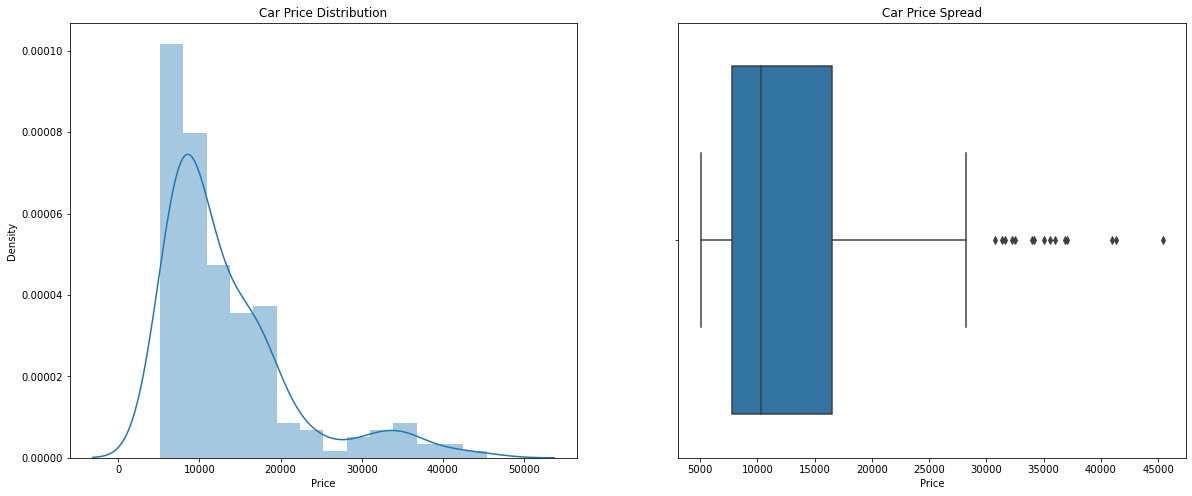

In [16]:
# Checking The Distribution Of Price (Dependent Variable)
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
# Plotting Distribution Plot For Checking If Price Is Normally Distributed
sns.distplot(df.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
# Plotting Box Plot For Outliers In Price
sns.boxplot(df.Price)

plt.show()

In [17]:
a = 0
for x in df.Price :
    if x >= 30000 :
        a += 1
print(f'Total rows (outliers) with price >= 30000 are {a}')

# Price Data Is Not Normally Distributed
# Price Data Is Right-Skewed 
# Price Data Have Outliers 
# 15 Car Models Have Price Greater than 30000 i.e. Lies In Outliers

Total rows (outliers) with price >= 30000 are 15


3.1 Visualizing Categorical Data

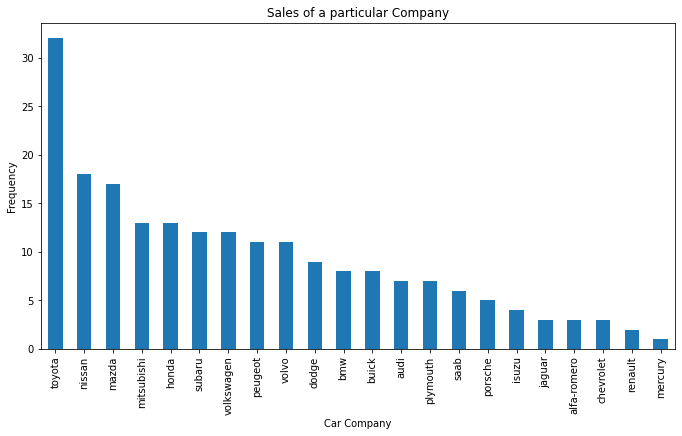

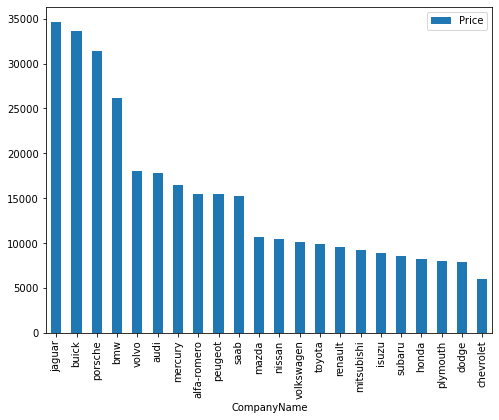

In [18]:
# Car Company Market Demand And Avg Price Analysis
plt.figure(figsize=(25,6))

plt.subplot(1,2,1)
# Plotting Bar Graph For Sale Of Each Company
plt1 = df.CompanyName.value_counts().plot.bar()
plt.title('Sales of a particular Company')
plt1.set(xlabel='Car Company', ylabel='Frequency')

# Analyzing Price & Company Name 
df1 = pd.DataFrame(df.groupby(['CompanyName'])['Price'].mean().sort_values(ascending=False))
df1.plot.bar(figsize=(8,6))

plt.show()

1. Toyota is the most demanded car company in market with good avg price followed by Nissan having slight higher avg price than Toyota
2. Mercury is the least demanded car in market but have fairly good avg price followed by renault
2. Jaguar company have the highest avg price although demand is not that much high followed Buick company which have good market as compared to Jaguar
3. Chevrolet company have the lowest avg price and demand is also low followed by Dodge but Dodge have good market demend

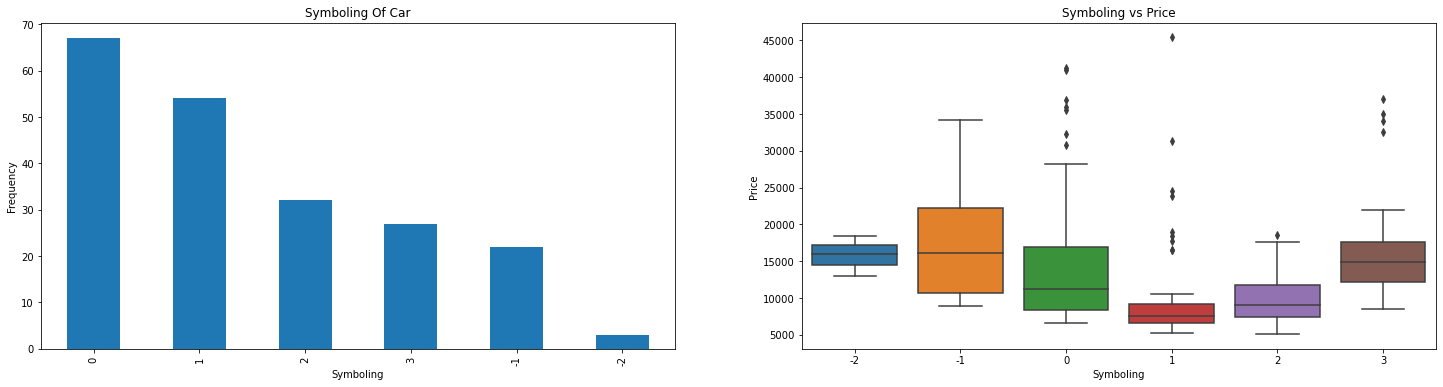

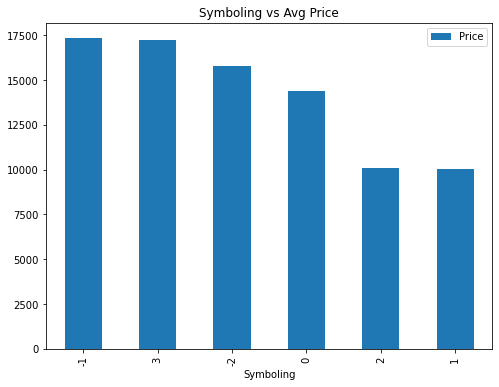

In [19]:
# Symboling Type Of Car Analysis
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
# Plotting Bar Graph For No Of Cars For Each Symboling
plt2 = df.Symboling.value_counts().plot.bar()
plt.title('Symboling Of Car')
plt2.set(xlabel='Symboling', ylabel='Frequency')

plt.subplot(1,2,2)
# Analyzing Price Range For Symboling
plt.title('Symboling vs Price')
sns.boxplot(x=df.Symboling, y=df.Price)

plt.show()

# Avg Price Anlaysis For Symboling
df2 = pd.DataFrame(df.groupby(['Symboling'])['Price'].mean().sort_values(ascending=False))
df2.plot.bar(figsize=(8,6))
plt.title('Symboling vs Avg Price')

plt.show()

1. Car with symboling 0 are the most demanded in market followed by symboling 1
2. Cars with symboling -1 have high price range where as symboling 1 have low prices but have outliers with fairly high prices
3. Cars with symboling -1 and 3 (because of outliers) have high and almost same avg price
4. Cars with symboling 1 have high avg price (have outliers with high prices) and 2 have low avg price but demand is fairly good in market for both

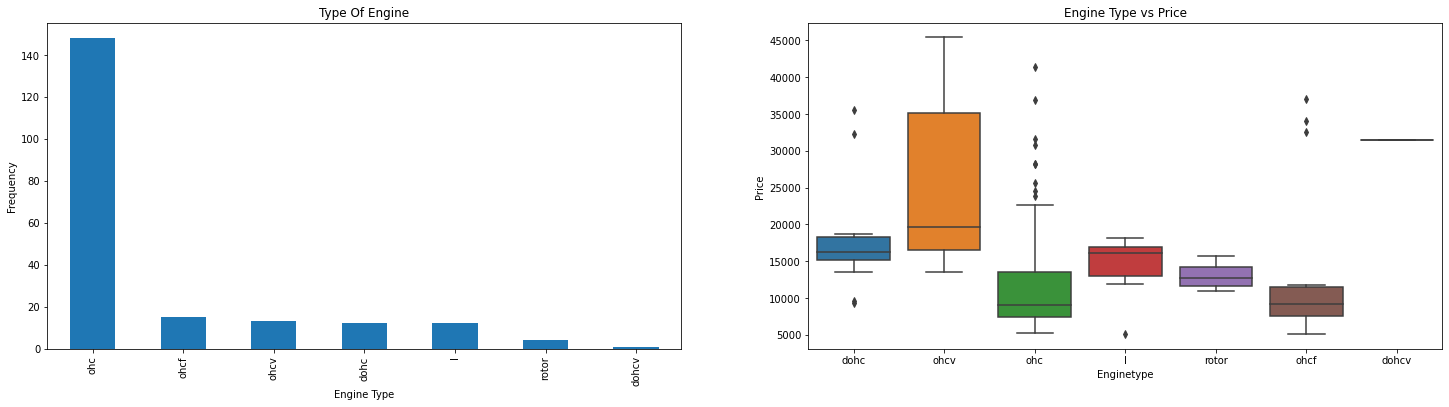

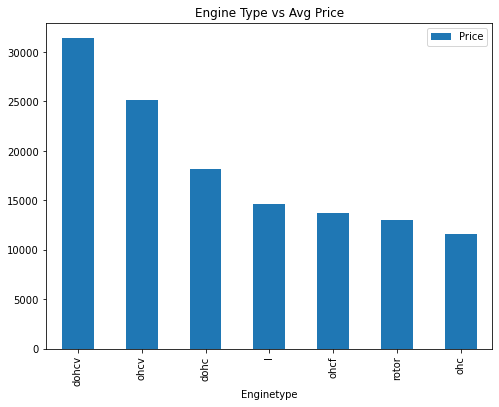

In [20]:
# Engine Type Analysis
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
# Plotting Bar Graph For Engine Type In Market
plt3 = df.Enginetype.value_counts().plot.bar()
plt.title('Type Of Engine')
plt3.set(xlabel='Engine Type', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
# Analyzing Price Range For Each Engine Type
sns.boxplot(x=df.Enginetype, y=df.Price)

plt.show()

# Analyzing Avg Price For Each Engine Type
df3 = pd.DataFrame(df.groupby(['Enginetype'])['Price'].mean().sort_values(ascending=False))
df3.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Avg Price')

plt.show()

1. Ohc type engine is most demanded engine in market followed by ohcf
2. Ohcv has the highest price range followed by dohcv, which have only one row
3. Ohc and Ohcf have fairly low price range (but have outliers with high prices) and ohc have very low avg price too
4. Avg price for dohcv is very high followed by ohcv

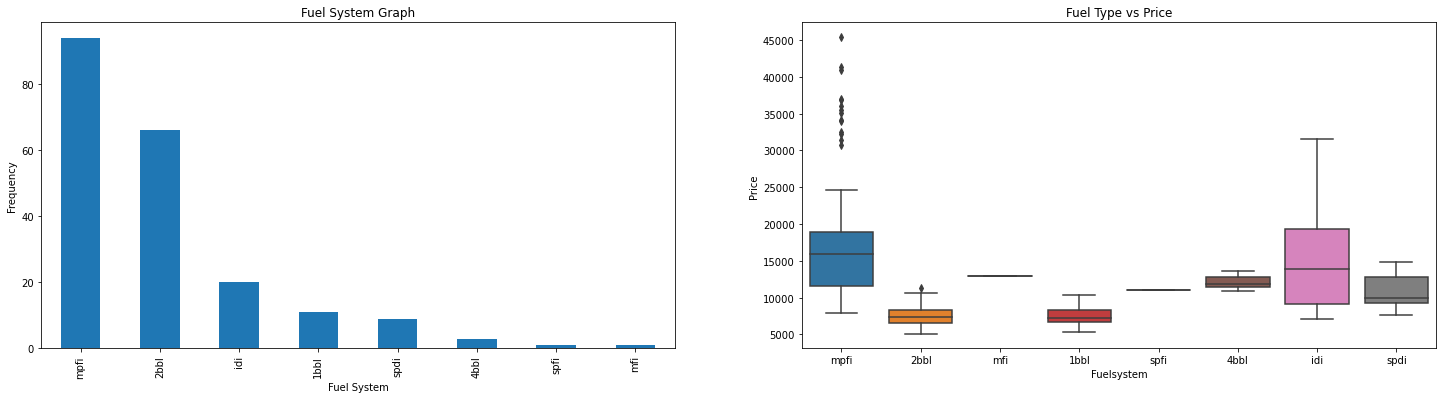

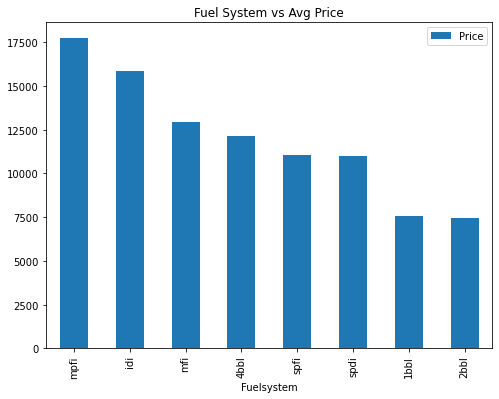

In [21]:
# Fuel System Analysis
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
# Plotting Bar Graph For Fuel System In Market
plt4 = df.Fuelsystem.value_counts().plot.bar()
plt.title('Fuel System Graph')
plt4.set(xlabel='Fuel System', ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
# Analyzing Price Range For Each Fuel System
sns.boxplot(x=df.Fuelsystem, y=df.Price)

plt.show()

# Analyzing Avg Price For Fuel System
df4 = pd.DataFrame(df.groupby(['Fuelsystem'])['Price'].mean().sort_values(ascending=False))
df4.plot.bar(figsize = (8,6))
plt.title('Fuel System vs Avg Price')

plt.show()

1. Cars with fuel system of mpfi are most in demand followed by 2bbl fuel type
2. mpfi have the highest avg price (fairly good price range but with outliers having high prices), followed by idi
3. idi fuel system have highest price range followed by mpfi
4. 1bbl and 2bbl have low price range with low avg prices
5. mfi and spfi is the least demanded fule system in market with only one entry each

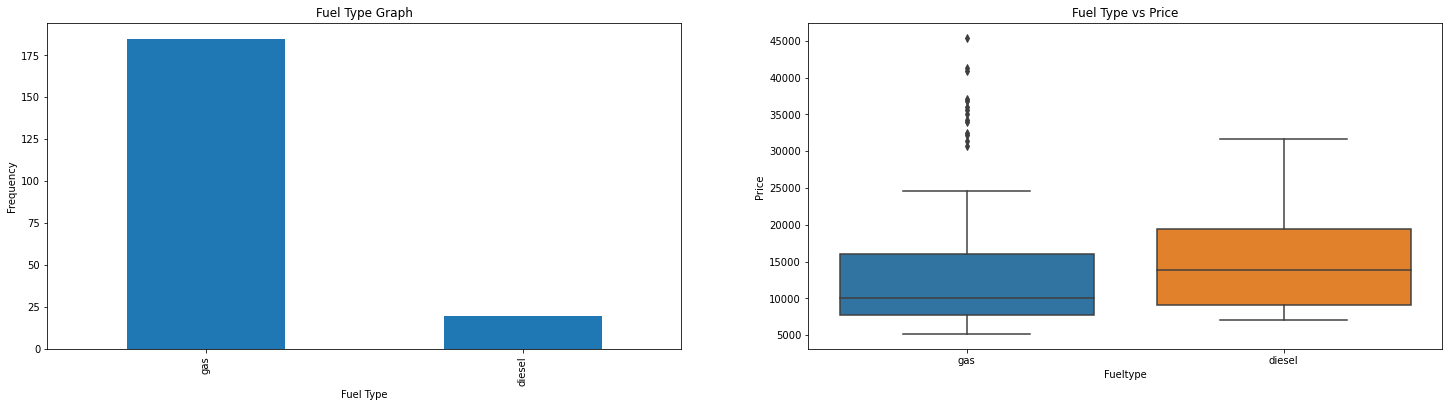

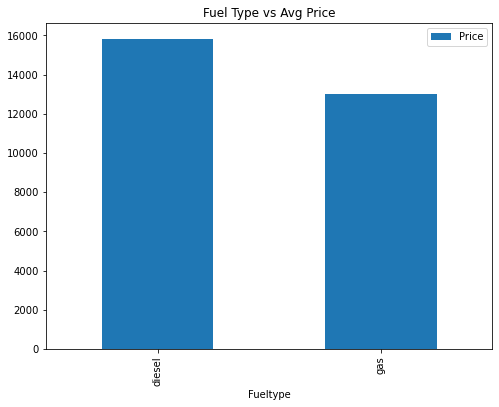

In [22]:
# Fuel Type analysis
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
# Plotting Bar Graph For Fuel Type In Market
plt5 = df.Fueltype.value_counts().plot.bar()
plt.title('Fuel Type Graph')
plt5.set(xlabel='Fuel Type',ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
# Analyzing Price Range For Fuel Type In Market
sns.boxplot(x=df.Fueltype, y=df.Price)

plt.show()

# Analyzing Avg Price For Fuel Type
df5 = pd.DataFrame(df.groupby(['Fueltype'])['Price'].mean().sort_values(ascending=False))
df5.plot.bar(figsize=(8,6))
plt.title('Fuel Type vs Avg Price')

plt.show()

1. Gas type fule car are in more demand in market
2. Price range for diesel is high but gas type fuel have many outliers with high price
3. Avg price for diesel car is higher

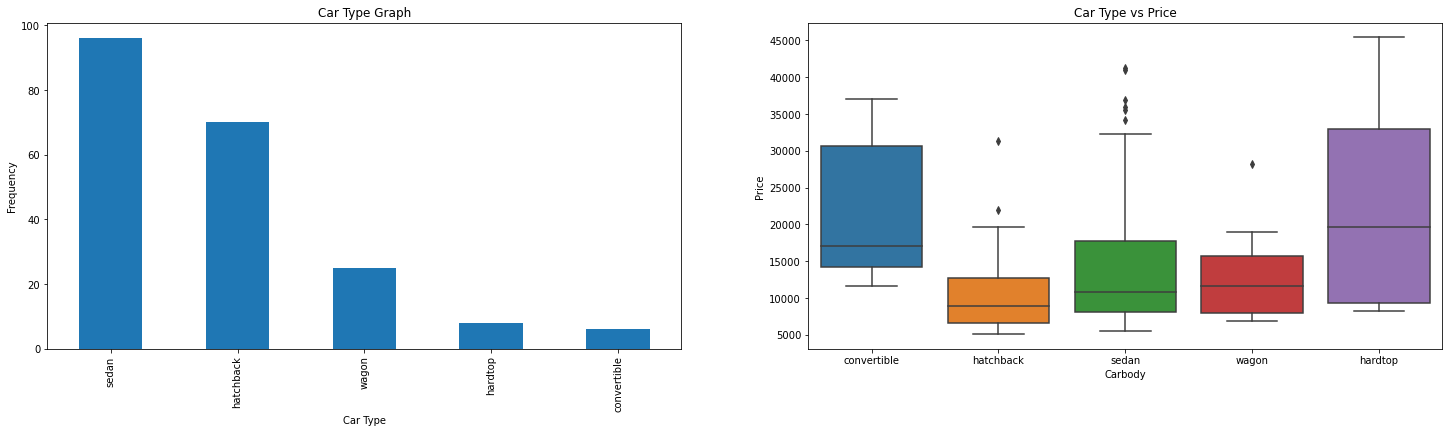

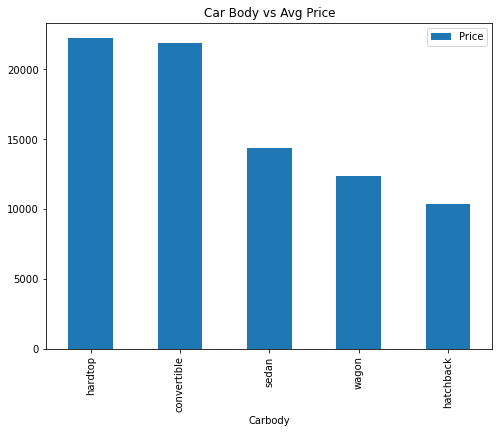

In [23]:
# Carbody Analysis
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
# Plotting Bar Graph For Each Type Of Car Body In Market
plt6 = df.Carbody.value_counts().plot.bar()
plt.title('Car Type Graph')
plt6.set(xlabel='Car Type',ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Car Type vs Price')
# Analyzing Price Range For Each Car Body Type
sns.boxplot(x=df.Carbody, y=df.Price)

plt.show()

# Analyzing Avg Price For Each Car Body Type
df6 = pd.DataFrame(df.groupby(['Carbody'])['Price'].mean().sort_values(ascending=False))
df6.plot.bar(figsize=(8,6))
plt.title('Car Body vs Avg Price')

plt.show()

1. Sedan is the most demand carbody in market (and have fairly good price range but with outliers having high prices) followed by hatchback
2. Convertible cars are very less in demand (but have fairly high price range) followed by hardtop carbody
3. Hardtop car have high price range and avg price followed by convertible
4. Hatchback car have minimum avg price (but fairly good demand in market) followed by wagon

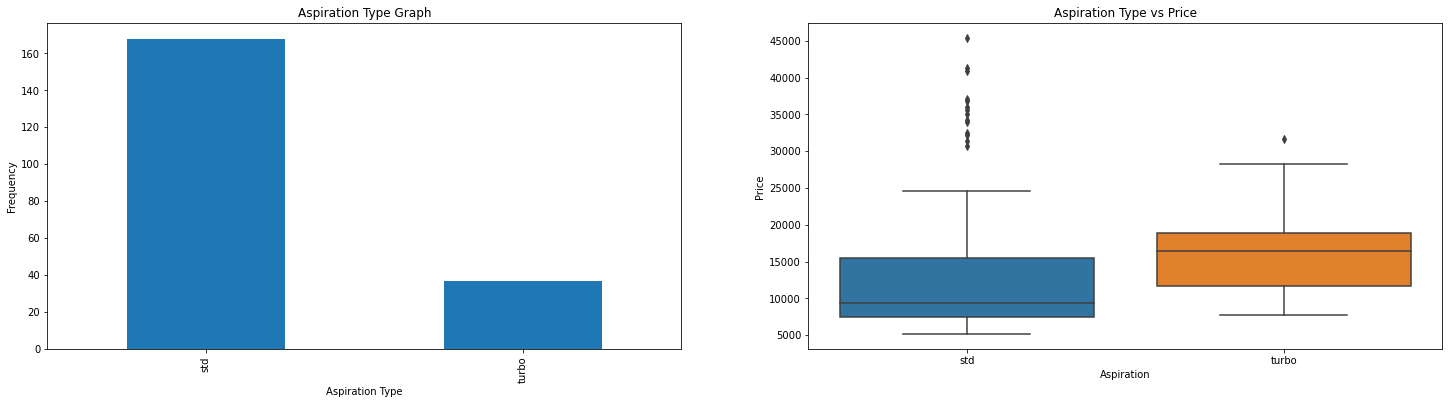

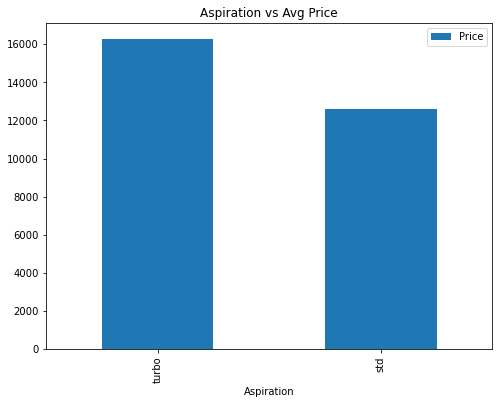

In [24]:
# Aspiration Analysis
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
# Plotting Bar Graph For Aspiration In Market
plt7 = df.Aspiration.value_counts().plot.bar()
plt.title('Aspiration Type Graph')
plt7.set(xlabel='Aspiration Type',ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Aspiration Type vs Price')
# Analyzing Price Range For Aspiration
sns.boxplot(x=df.Aspiration, y=df.Price)

plt.show()

# Analyzing Avg Price For Aspiration
df7 = pd.DataFrame(df.groupby(['Aspiration'])['Price'].mean().sort_values(ascending=False))
df7.plot.bar(figsize=(8,6))
plt.title('Aspiration vs Avg Price')

plt.show()

1. Cars with aspiration type std are most in demand in market (have fairly low price range but have outliers with high prices)
2. Turbo aspiratin type cars have high price range and also have avg price

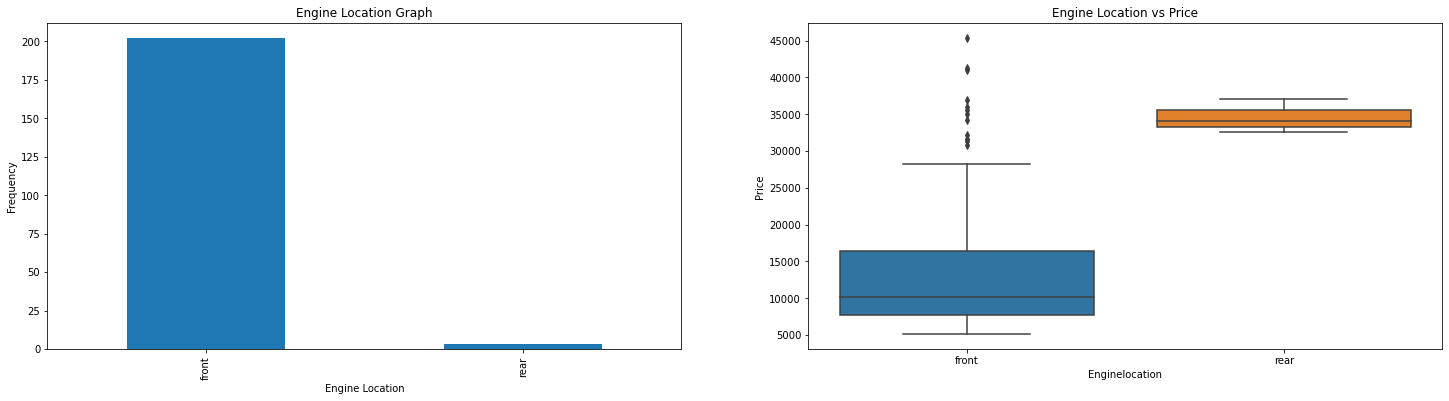

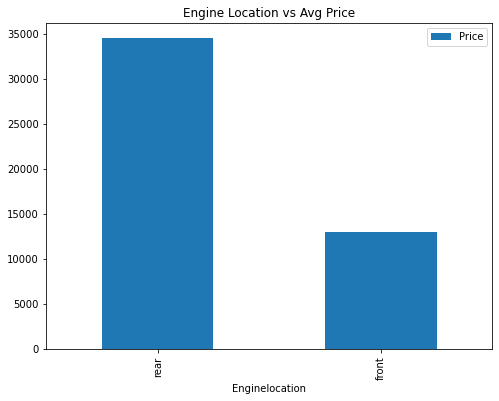

In [25]:
# Engine Location Anlaysis
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
# Plotting Bar Graph For Engine Location
plt8 = df.Enginelocation.value_counts().plot.bar()
plt.title('Engine Location Graph')
plt8.set(xlabel='Engine Location',ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Engine Location vs Price')
# Analyzing Price Range For Engine Location
sns.boxplot(x=df.Enginelocation, y=df.Price)

plt.show()

# Analyzing Avg Price For Engine Location
df8 = pd.DataFrame(df.groupby(['Enginelocation'])['Price'].mean().sort_values(ascending=False))
df8.plot.bar(figsize=(8,6))
plt.title('Engine Location vs Avg Price')

plt.show()

1. Cars with engine in front are most indemand in market and have low avg price (but have outliers with high prices)
2. Cars with engine in rear have high price range and also have high avg price

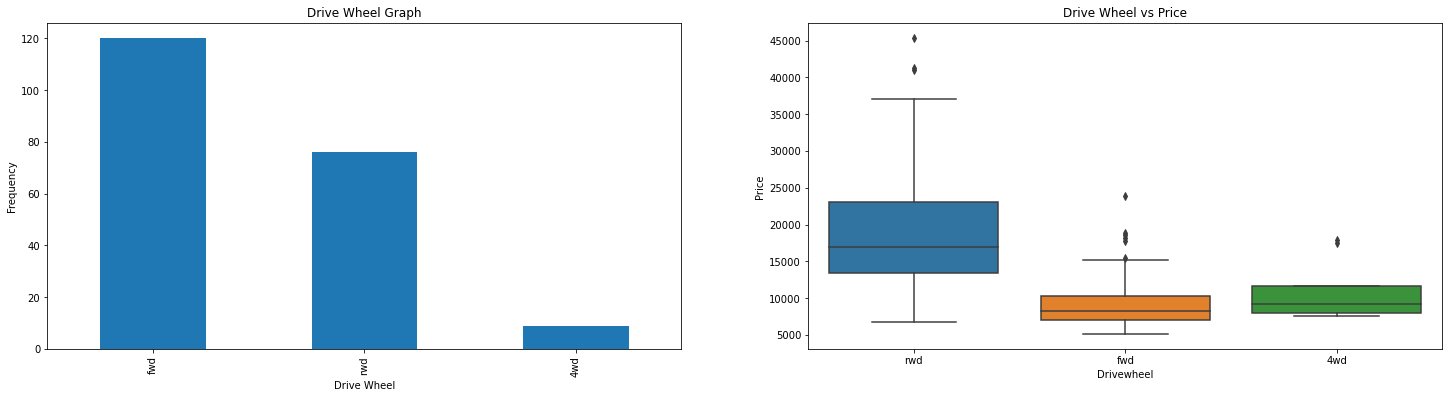

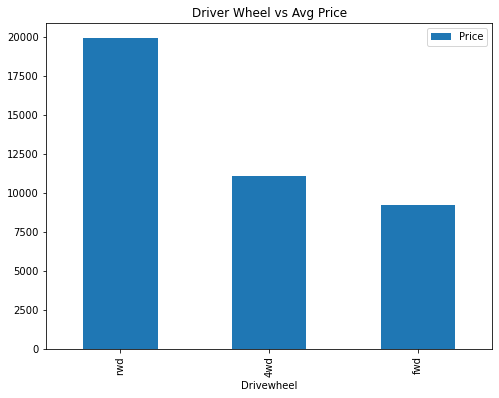

In [26]:
# Driver Wheel Analysis
plt.figure(figsize = (25,6))

plt.subplot(1,2,1)
# Plotting Bar Graph For Driver Wheel
plt9 = df.Drivewheel.value_counts().plot.bar()
plt.title('Drive Wheel Graph')
plt9.set(xlabel='Drive Wheel',ylabel='Frequency')

plt.subplot(1,2,2)
plt.title('Drive Wheel vs Price')
# Analyzing Price Range For Driver Wheel
sns.boxplot(x=df.Drivewheel, y=df.Price)

plt.show()

# Analyzing Avg Price For Driver Wheel
df9 = pd.DataFrame(df.groupby(['Drivewheel'])['Price'].mean().sort_values(ascending=False))
df9.plot.bar(figsize=(8,6))
plt.title('Driver Wheel vs Avg Price')
plt.show()

1. Cars with fwd drive wheel are most in demand in market followed by rwd
2. rwd cars have high price range followed by fwd (with outliers having prices out of range)
3. rwd cars have high avg price followed by 4wd cars
4. fwd have lowest avg price

3.2 Visualizing Numerical Data

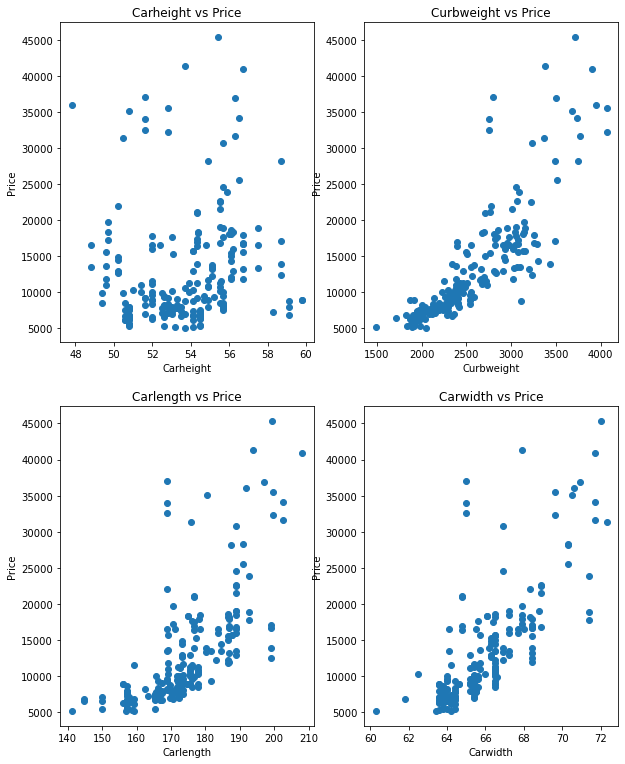

In [27]:
# Creating A Function For Visualizing Car Shape, Size, Height & Weight vs Price

def scatter(x,fig):
    # 3 rows and 2 columns in showing graph
    plt.subplot(3,2,fig)
    # Plotting Scatter Plot 
    plt.scatter(df[x],df['Price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)
    
plt.figure(figsize=(10,20))

scatter('Carheight',1)
scatter('Curbweight',2)
scatter('Carlength',3)
scatter('Carwidth',4)
# Figuring Out Imp Num Columns Linearly Dependent On Price

plt.show()

1. Car Height is not related to price of car thus can be neglected
2. Car weight, car width & car length are showing are corelated with price (i.e. Increases as price increases) thus will be included in model

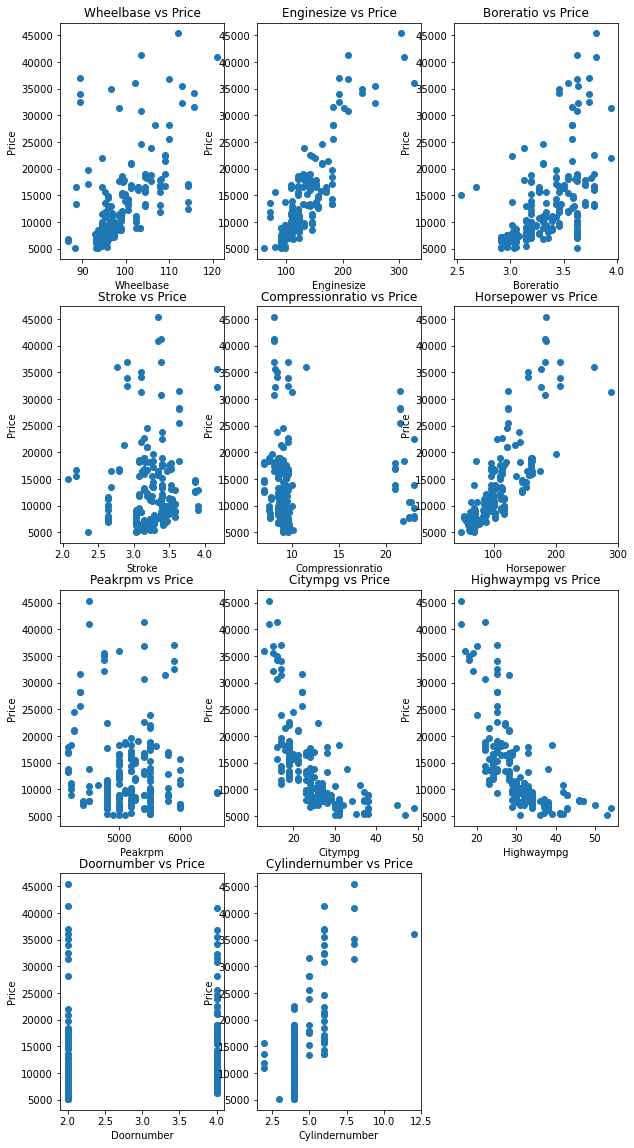

In [28]:
# Creating A Function For Visualizing Other Variables With Price

def scatter1(x,fig):
    # 4 rows & 3 columns in showing graphs
    plt.subplot(4,3,fig)
    plt.scatter(df[x],df['Price'])
    plt.title(x+' vs Price')
    plt.xlabel(x)
    plt.ylabel('Price')
    
plt.figure(figsize=(10,20))

scatter1('Wheelbase',1)
scatter1('Enginesize',2)
scatter1('Boreratio',3)
scatter1('Stroke',4)
scatter1('Compressionratio',5)
scatter1('Horsepower',6)
scatter1('Peakrpm',7)
scatter1('Citympg',8)
scatter1('Highwaympg',9)
scatter1('Doornumber',10)
scatter1('Cylindernumber',11)

# Figuring Out Imp Num Columns Linearly Dependent On Price
plt.show()

1. Door No, Cylinder No, Peakrpm, Stoke and Compression ratio are not corelated to price thus can be neglected
2. Citympg and Highwaympg are negatively corelated to price
3. Wheelbase, Engine size, Bore ratio and Horse power are corelatyed to price thus will be considered 
4. As No Of Cylinders Are Increasing The Price Is Also Increasing

3.3 Creating New Feature

In [29]:
# Creating A New Column For Fuel Economy
df['Fueleconomy'] = (0.50*df['Citympg']) +(0.50*df['Highwaympg'])
df

,Car_ID,Symboling,CompanyName,Fueltype,Aspiration,Doornumber,Carbody,Drivewheel,Enginelocation,Wheelbase,...,Fuelsystem,Boreratio,Stroke,Compressionratio,Horsepower,Peakrpm,Citympg,Highwaympg,Price,Fueleconomy
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,27.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,25.5
201,202,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,22.0
202,203,-1,volvo,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,20.5
203,204,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,26.5


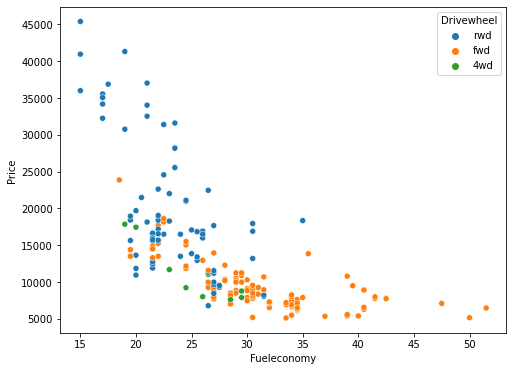

In [30]:
# Checking Fuel Economy vs Price relation

plt.figure(figsize=(8,6))

# Also Analyzing If Driver Wheel Is A Price Determining Factor Or Not
sns.scatterplot(x=df['Fueleconomy'],y=df['Price'], hue=df['Drivewheel'])
plt.xlabel('Fueleconomy')
plt.ylabel('Price')
plt.show()

1. Fuel economy is negatively corelated with price
2. Drive wheel with fwd type have high fuel economy and low price
3. Drive wheel with rwd type have low fuel economy and fairly high price

In [31]:
# Creating Bins For Car Company On The Basis Of Avg Price

cardf = df.copy()
binr = cardf.groupby(['CompanyName'])['Price'].mean()
cardf = cardf.merge(binr.reset_index(),how='left',on='CompanyName') # how = left i.e. left Join
bins = [0,10000,20000,40000]
car_bins = ['Budget','Medium','Highend']
df['Carrange'] = pd.cut(cardf['Price_y'],bins,right=False,labels=car_bins)
df

,Car_ID,Symboling,CompanyName,Fueltype,Aspiration,Doornumber,Carbody,Drivewheel,Enginelocation,Wheelbase,...,Boreratio,Stroke,Compressionratio,Horsepower,Peakrpm,Citympg,Highwaympg,Price,Fueleconomy,Carrange
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,24.0,Medium
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,24.0,Medium
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,22.5,Medium
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,27.0,Medium
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,20.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,4,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,25.5,Medium
201,202,-1,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,22.0,Medium
202,203,-1,volvo,gas,std,4,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,20.5,Medium
203,204,-1,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,26.5,Medium


<Figure size 576x432 with 0 Axes>

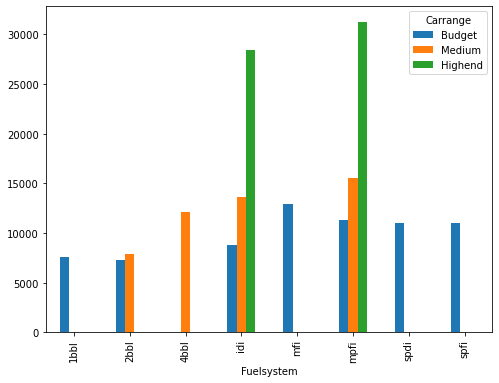

In [32]:
# Checking For Car Range and Avg Price
plt.figure(figsize=(8,6))

df10 = pd.DataFrame(df.groupby(['Fuelsystem','Carrange'])['Price'].mean().unstack(fill_value=0))
df10.plot.bar(figsize=(8,6))
plt.show()

 Variables Which Are Important For Car Price Prediction

Variable Which Are Linearly Related To Price After Analyzing :
  Fuel Economy, Car Range, Wheel base, Engine Size, Bore Ratio, Horse Power, Car Weight, Car Width, Car Length, Car Body, Engine Type, Cylinder Number, Aspiration, Fuel Type, Driver Wheel

In [33]:
# Taking Important Variables After Analyzing
car_df = df[['Price','Fueleconomy','Aspiration','Carbody','Wheelbase','Drivewheel','Carrange','Enginesize','Horsepower','Boreratio','Curbweight','Carwidth','Carlength','Cylindernumber','Fueltype','Enginetype']]
car_df.head()

,Price,Fueleconomy,Aspiration,Carbody,Wheelbase,Drivewheel,Carrange,Enginesize,Horsepower,Boreratio,Curbweight,Carwidth,Carlength,Cylindernumber,Fueltype,Enginetype
0,13495.0,24.0,std,convertible,88.6,rwd,Medium,130,111,3.47,2548,64.1,168.8,4,gas,dohc
1,16500.0,24.0,std,convertible,88.6,rwd,Medium,130,111,3.47,2548,64.1,168.8,4,gas,dohc
2,16500.0,22.5,std,hatchback,94.5,rwd,Medium,152,154,2.68,2823,65.5,171.2,6,gas,ohcv
3,13950.0,27.0,std,sedan,99.8,fwd,Medium,109,102,3.19,2337,66.2,176.6,4,gas,ohc
4,17450.0,20.0,std,sedan,99.4,4wd,Medium,136,115,3.19,2824,66.4,176.6,5,gas,ohc


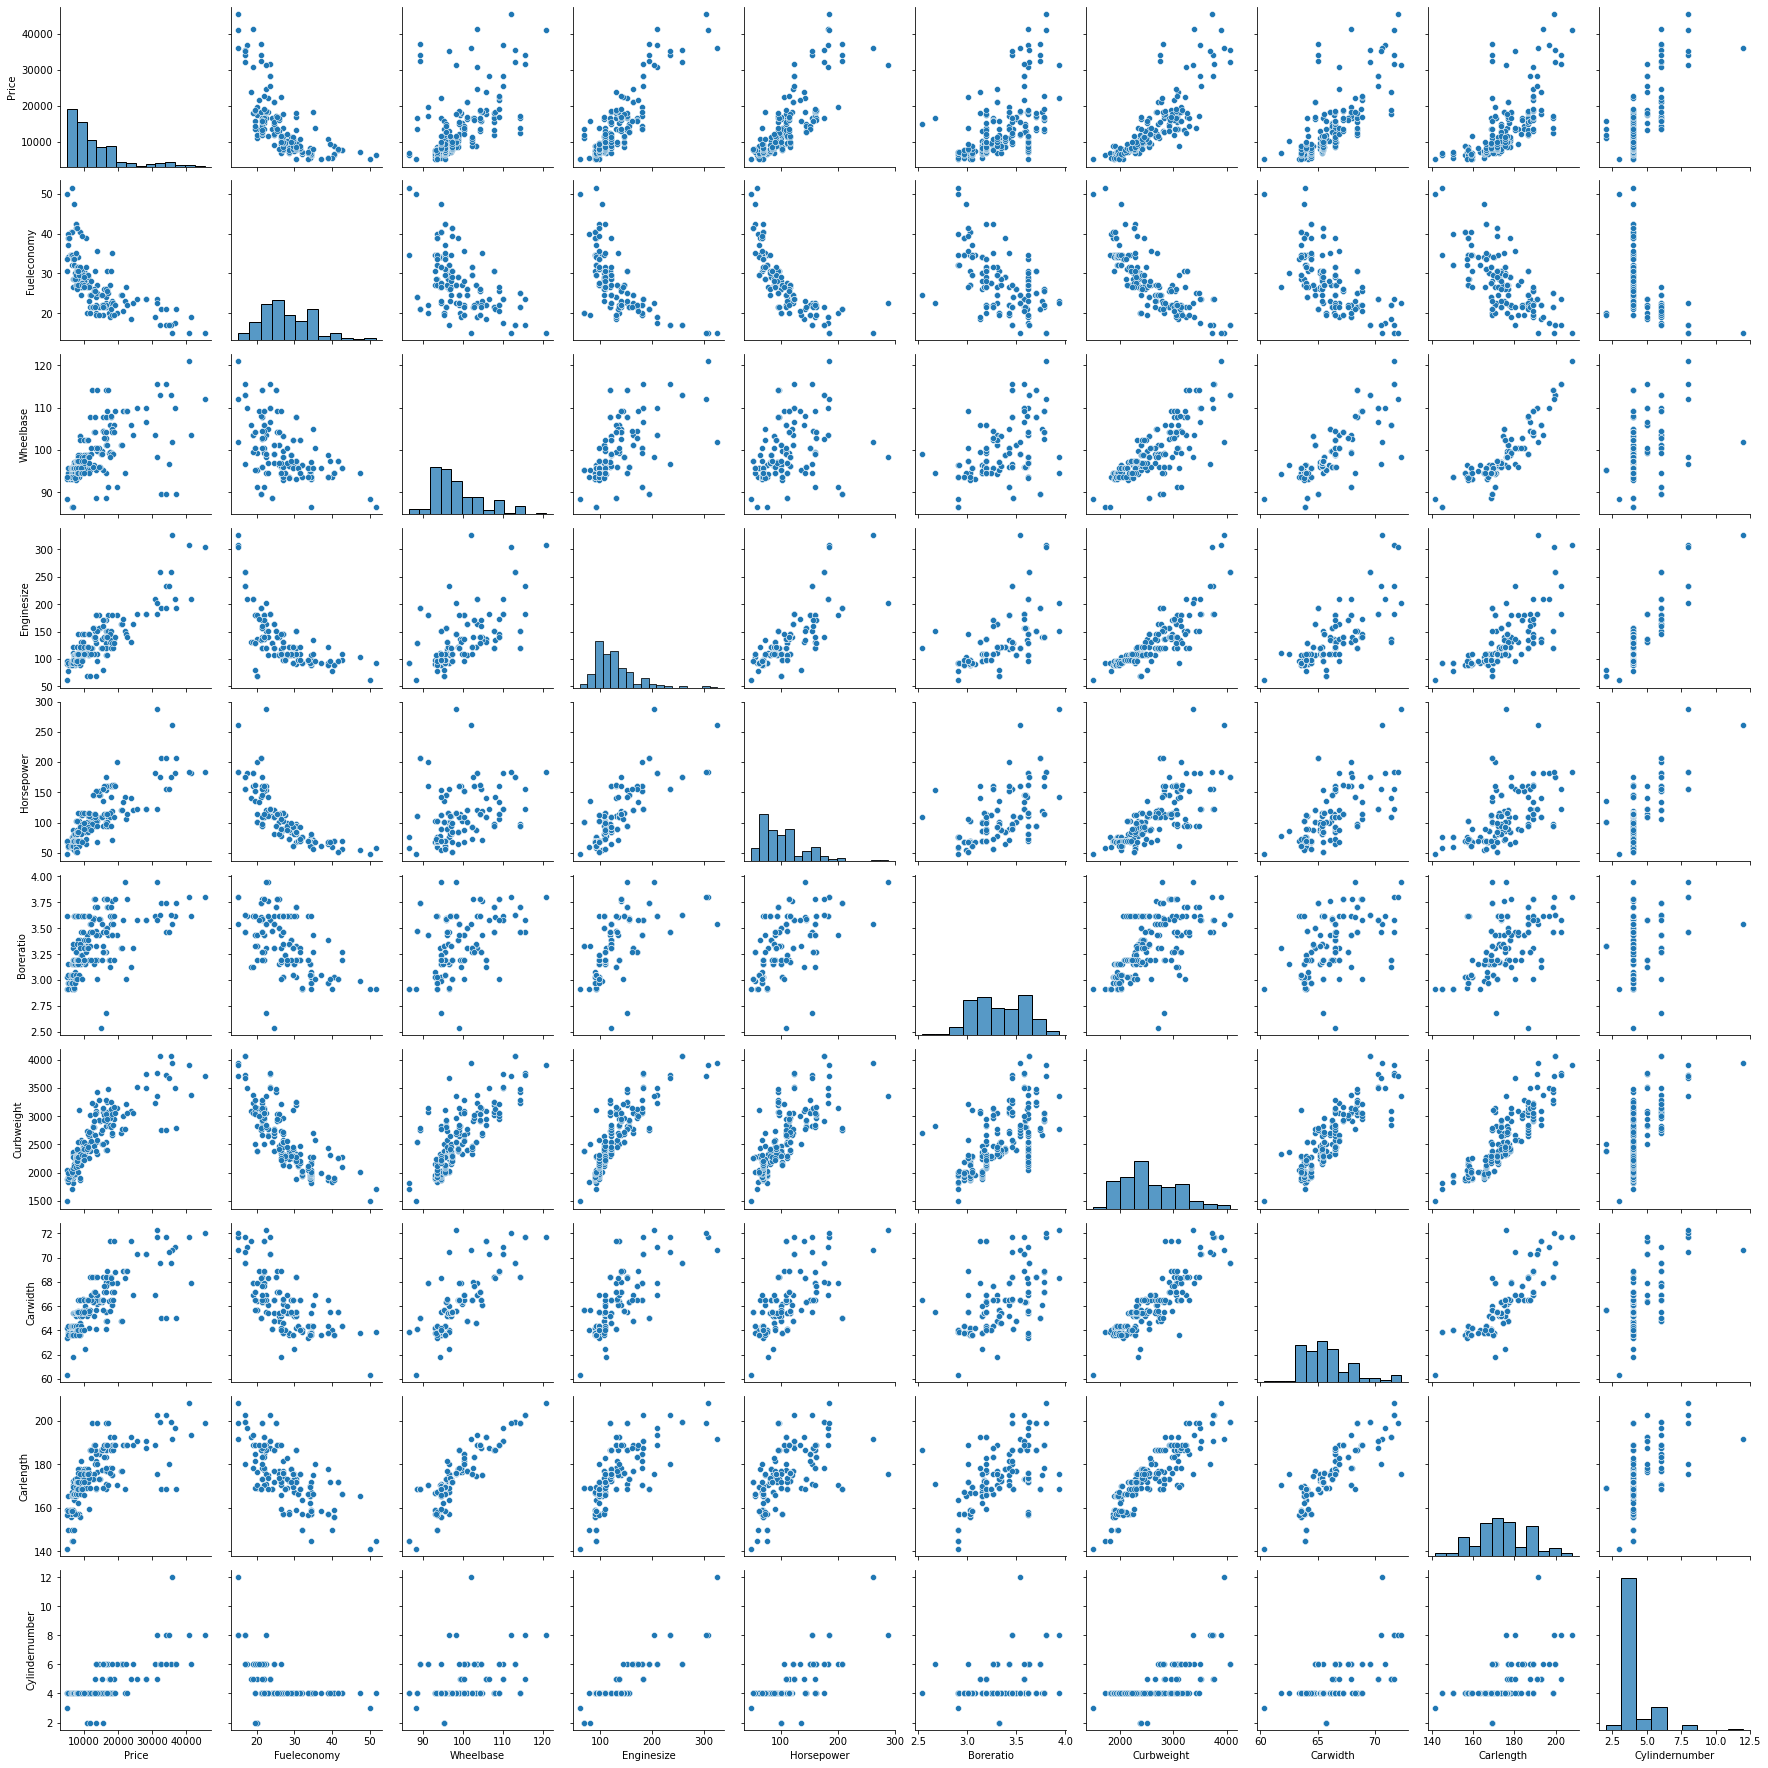

In [34]:
#Checking Corelation Between Analyzed Variables
sns.pairplot(car_df)
plt.show()

In [35]:
car_df

,Price,Fueleconomy,Aspiration,Carbody,Wheelbase,Drivewheel,Carrange,Enginesize,Horsepower,Boreratio,Curbweight,Carwidth,Carlength,Cylindernumber,Fueltype,Enginetype
0,13495.0,24.0,std,convertible,88.6,rwd,Medium,130,111,3.47,2548,64.1,168.8,4,gas,dohc
1,16500.0,24.0,std,convertible,88.6,rwd,Medium,130,111,3.47,2548,64.1,168.8,4,gas,dohc
2,16500.0,22.5,std,hatchback,94.5,rwd,Medium,152,154,2.68,2823,65.5,171.2,6,gas,ohcv
3,13950.0,27.0,std,sedan,99.8,fwd,Medium,109,102,3.19,2337,66.2,176.6,4,gas,ohc
4,17450.0,20.0,std,sedan,99.4,4wd,Medium,136,115,3.19,2824,66.4,176.6,5,gas,ohc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,25.5,std,sedan,109.1,rwd,Medium,141,114,3.78,2952,68.9,188.8,4,gas,ohc
201,19045.0,22.0,turbo,sedan,109.1,rwd,Medium,141,160,3.78,3049,68.8,188.8,4,gas,ohc
202,21485.0,20.5,std,sedan,109.1,rwd,Medium,173,134,3.58,3012,68.9,188.8,6,gas,ohcv
203,22470.0,26.5,turbo,sedan,109.1,rwd,Medium,145,106,3.01,3217,68.9,188.8,6,diesel,ohc


In [36]:
# Feature Scaling Of Numerical Values (For Adjusting High Values To One Scale)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_vars = ['Price','Fueleconomy','Wheelbase','Enginesize','Horsepower','Boreratio','Curbweight','Carwidth','Carlength','Cylindernumber']
car_df[num_vars] = scaler.fit_transform(car_df[num_vars])

<ipython-input-36-e70f7a3968b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_df[num_vars] = scaler.fit_transform(car_df[num_vars])
C:\Users\Manoj Kumar\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [37]:
car_df

,Price,Fueleconomy,Aspiration,Carbody,Wheelbase,Drivewheel,Carrange,Enginesize,Horsepower,Boreratio,Curbweight,Carwidth,Carlength,Cylindernumber,Fueltype,Enginetype
0,0.207959,0.246575,std,convertible,0.058309,rwd,Medium,0.260377,0.262500,0.664286,0.411171,0.316667,0.413433,0.2,gas,dohc
1,0.282558,0.246575,std,convertible,0.058309,rwd,Medium,0.260377,0.262500,0.664286,0.411171,0.316667,0.413433,0.2,gas,dohc
2,0.282558,0.205479,std,hatchback,0.230321,rwd,Medium,0.343396,0.441667,0.100000,0.517843,0.433333,0.449254,0.4,gas,ohcv
3,0.219254,0.328767,std,sedan,0.384840,fwd,Medium,0.181132,0.225000,0.464286,0.329325,0.491667,0.529851,0.2,gas,ohc
4,0.306142,0.136986,std,sedan,0.373178,4wd,Medium,0.283019,0.279167,0.464286,0.518231,0.508333,0.529851,0.3,gas,ohc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.291123,0.287671,std,sedan,0.655977,rwd,Medium,0.301887,0.275000,0.885714,0.567882,0.716667,0.711940,0.2,gas,ohc
201,0.345738,0.191781,turbo,sedan,0.655977,rwd,Medium,0.301887,0.466667,0.885714,0.605508,0.708333,0.711940,0.2,gas,ohc
202,0.406311,0.150685,std,sedan,0.655977,rwd,Medium,0.422642,0.358333,0.742857,0.591156,0.716667,0.711940,0.4,gas,ohcv
203,0.430763,0.315068,turbo,sedan,0.655977,rwd,Medium,0.316981,0.241667,0.335714,0.670675,0.716667,0.711940,0.4,diesel,ohc


# 4. Creating Dummy Variables For Categorical Variables

In [38]:
def dummyvar(x,df11):
    y = pd.get_dummies(df11[x],drop_first = True)
    df11 = pd.concat([df11,y],axis=1)
    df11.drop([x],axis=1,inplace=True)
    return df11

car_df = dummyvar('Fueltype',car_df)
car_df = dummyvar('Aspiration',car_df)
car_df = dummyvar('Carbody',car_df)
car_df = dummyvar('Drivewheel',car_df)
car_df = dummyvar('Enginetype',car_df)
car_df = dummyvar('Carrange',car_df)

In [39]:
car_df.head()

,Price,Fueleconomy,Wheelbase,Enginesize,Horsepower,Boreratio,Curbweight,Carwidth,Carlength,Cylindernumber,...,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,Medium,Highend
0,0.207959,0.246575,0.058309,0.260377,0.262500,0.664286,0.411171,0.316667,0.413433,0.2,...,0,1,0,0,0,0,0,0,1,0
1,0.282558,0.246575,0.058309,0.260377,0.262500,0.664286,0.411171,0.316667,0.413433,0.2,...,0,1,0,0,0,0,0,0,1,0
2,0.282558,0.205479,0.230321,0.343396,0.441667,0.100000,0.517843,0.433333,0.449254,0.4,...,0,1,0,0,0,0,1,0,1,0
3,0.219254,0.328767,0.384840,0.181132,0.225000,0.464286,0.329325,0.491667,0.529851,0.2,...,1,0,0,0,1,0,0,0,1,0
4,0.306142,0.136986,0.373178,0.283019,0.279167,0.464286,0.518231,0.508333,0.529851,0.3,...,0,0,0,0,1,0,0,0,1,0


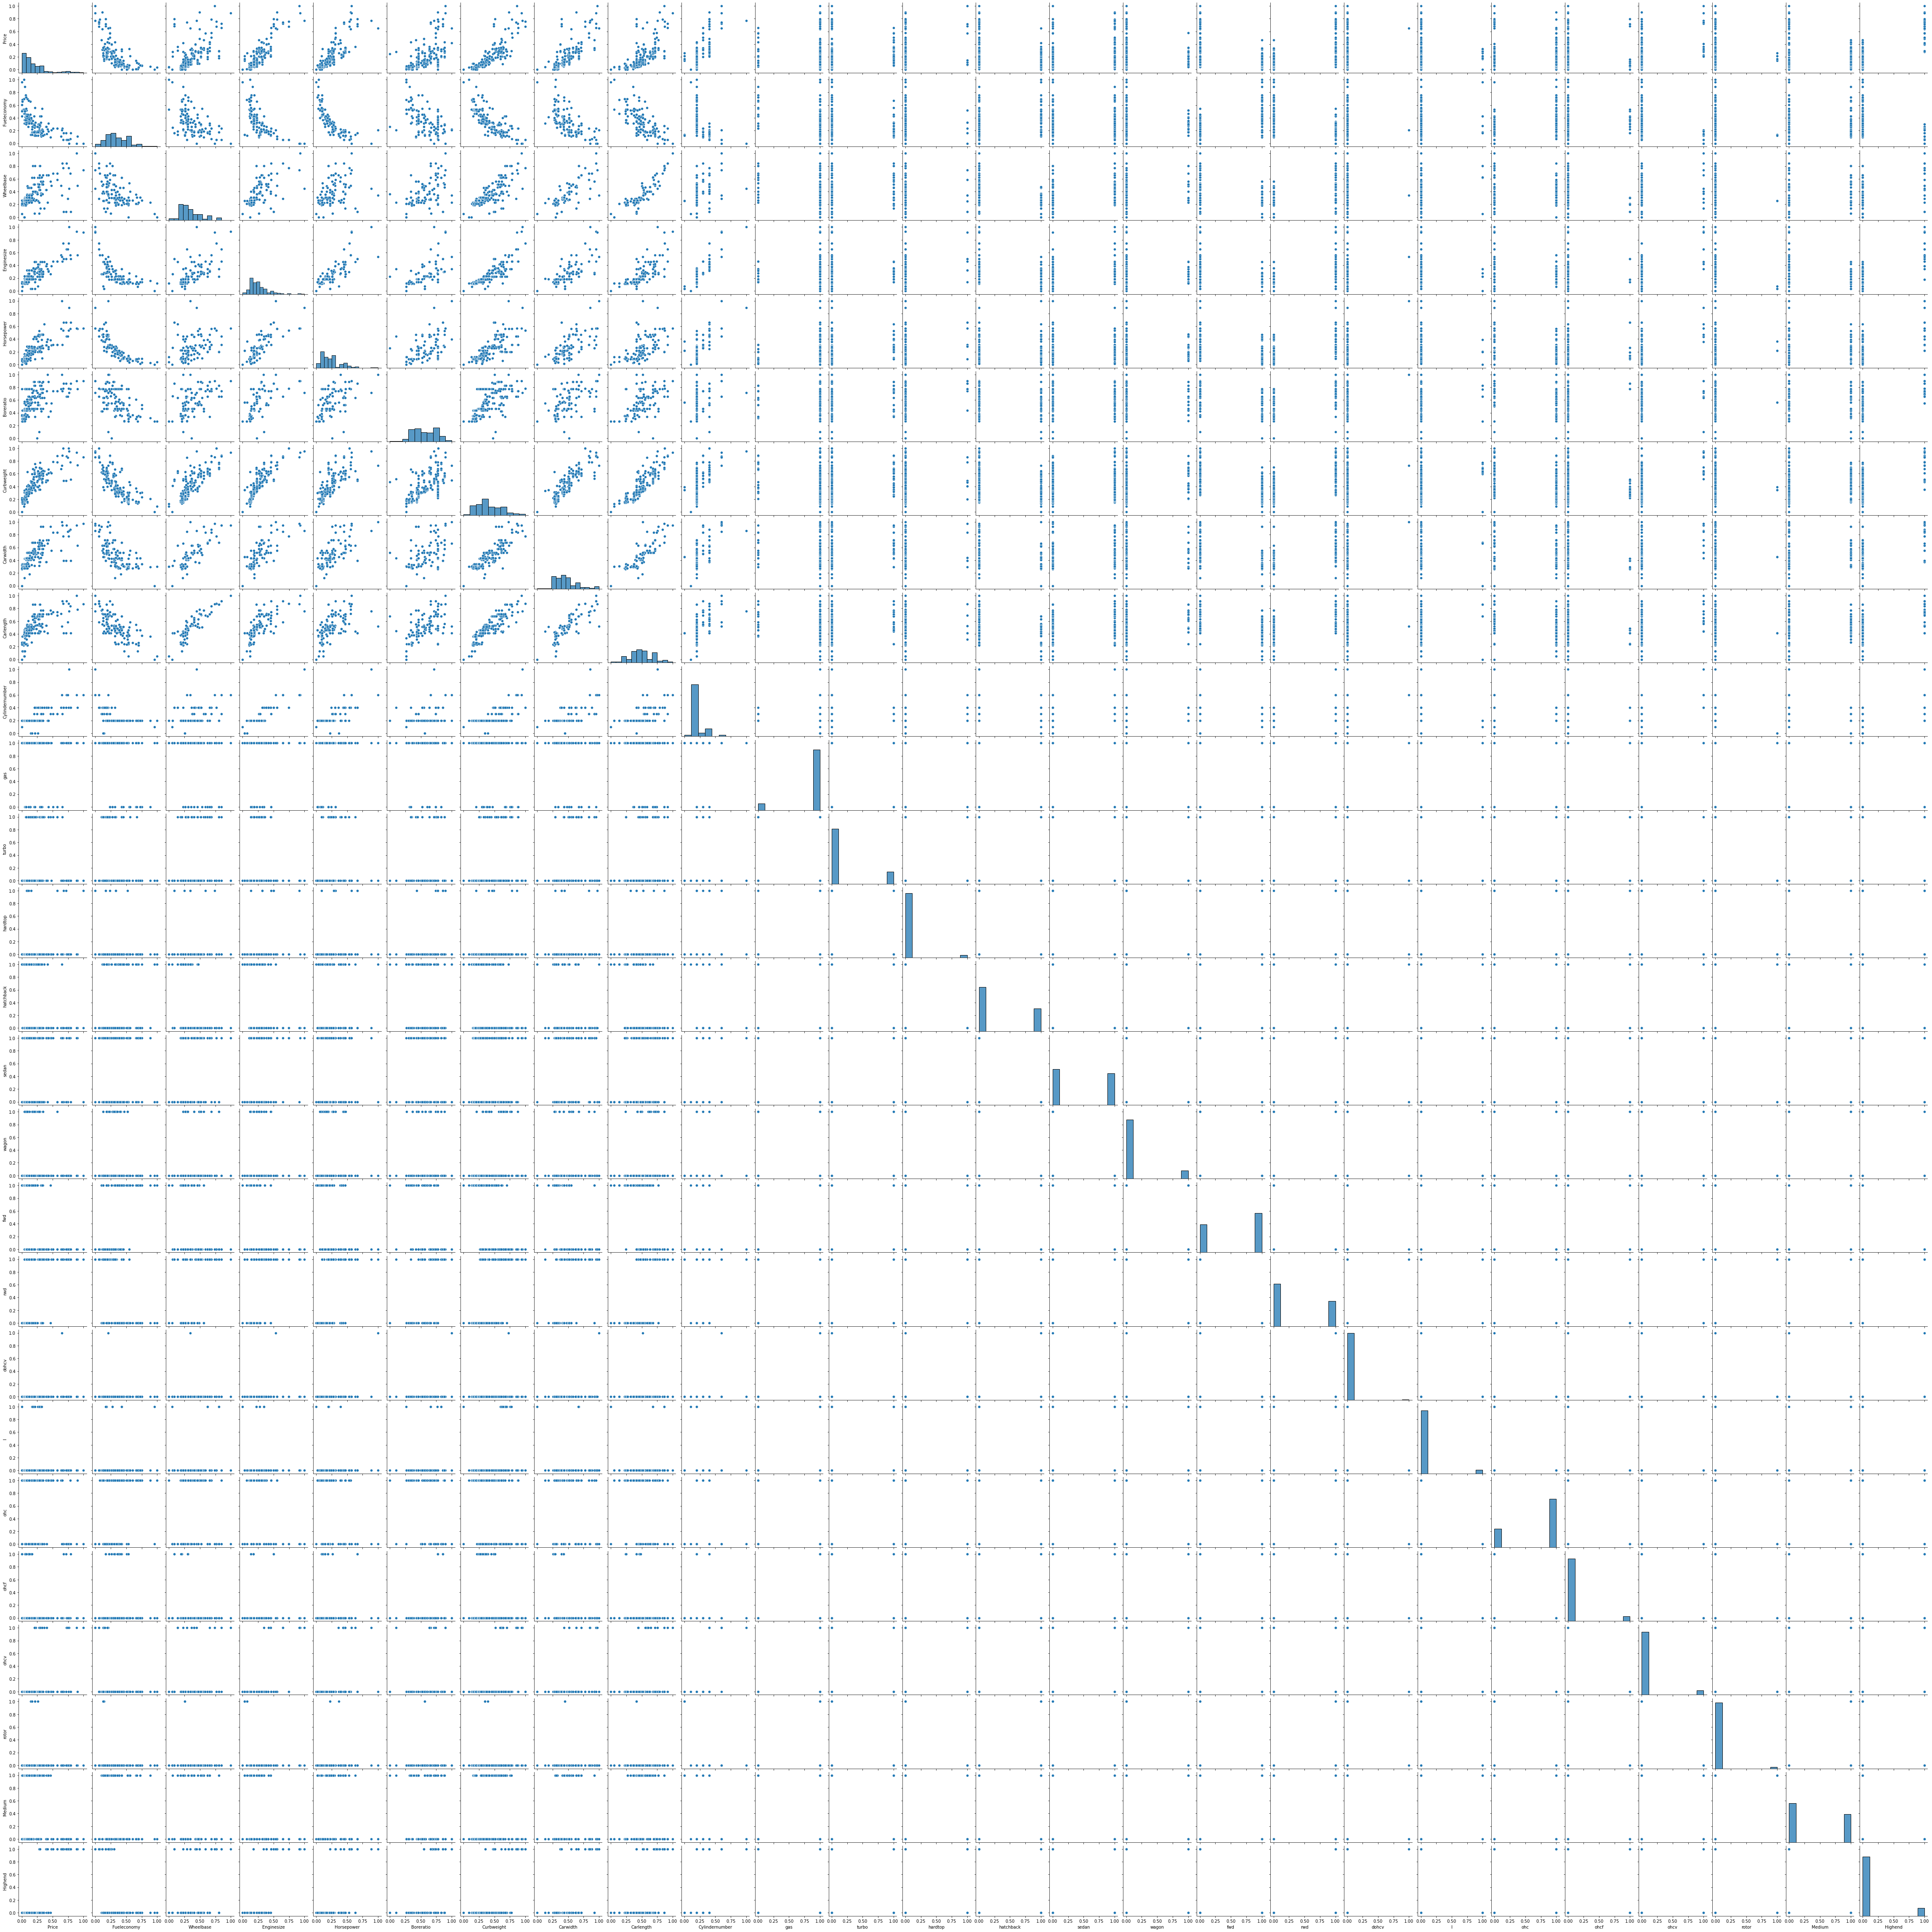

In [40]:
#Checking Corelation Between Analyzed Variables
sns.pairplot(car_df)
plt.show()

# 5. Checking For Multi-Collinearity

In [41]:
car_df.dtypes

Price             float64
Fueleconomy       float64
Wheelbase         float64
Enginesize        float64
Horsepower        float64
Boreratio         float64
Curbweight        float64
Carwidth          float64
Carlength         float64
Cylindernumber    float64
gas                 uint8
turbo               uint8
hardtop             uint8
hatchback           uint8
sedan               uint8
wagon               uint8
fwd                 uint8
rwd                 uint8
dohcv               uint8
l                   uint8
ohc                 uint8
ohcf                uint8
ohcv                uint8
rotor               uint8
Medium              uint8
Highend             uint8
dtype: object

In [42]:
# Multi-Collinearity Can Be Checked Through Heat Map or By VIF Score

In [43]:
# Checking VIF Score For Dependency Of Independent Variables On Each Other
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = car_df.columns
vif['VIF'] = [variance_inflation_factor(car_df.values, i) for i in range(car_df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Carlength,115.75
6,Curbweight,115.33
3,Enginesize,90.72
9,Cylindernumber,67.45
7,Carwidth,63.79
5,Boreratio,57.80
4,Horsepower,45.81
2,Wheelbase,44.34
0,Price,33.99
14,sedan,28.31


In [64]:
# Removing All Those Columns Having VIF Score More Than 5 and Checking After Removing
data = car_df.drop(['Carwidth','Carlength','Wheelbase','Boreratio','Curbweight','Enginesize','Cylindernumber','fwd','Horsepower','hatchback','ohc','gas'], axis = 1)

In [65]:
data

,Price,Fueleconomy,turbo,hardtop,sedan,wagon,rwd,dohcv,l,ohcf,ohcv,rotor,Medium,Highend
0,0.207959,0.246575,0,0,0,0,1,0,0,0,0,0,1,0
1,0.282558,0.246575,0,0,0,0,1,0,0,0,0,0,1,0
2,0.282558,0.205479,0,0,0,0,1,0,0,0,1,0,1,0
3,0.219254,0.328767,0,0,1,0,0,0,0,0,0,0,1,0
4,0.306142,0.136986,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.291123,0.287671,0,0,1,0,1,0,0,0,0,0,1,0
201,0.345738,0.191781,1,0,1,0,1,0,0,0,0,0,1,0
202,0.406311,0.150685,0,0,1,0,1,0,0,0,1,0,1,0
203,0.430763,0.315068,1,0,1,0,1,0,0,0,0,0,1,0


In [66]:
# Again Checking VIF Score After Removing Variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = data.columns
vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Price,10.27
13,Highend,4.65
6,rwd,3.39
12,Medium,2.72
4,sedan,2.58
1,Fueleconomy,2.09
2,turbo,1.47
10,ohcv,1.42
8,l,1.40
5,wagon,1.39


In [67]:
y_axis = data['Price']
independent_vars=data.drop(['Price'],axis=1)

In [68]:
print(len(y_axis))
print(len(independent_vars))

205
205


# 6. Splitting Data For Training And Testing

In [69]:
# To Create A Model On 70% Of Trained Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(independent_vars,y_axis,test_size=0.3, random_state=100)

In [70]:
print(len(X_train))
print(len(y_train))

143
143


In [71]:
print(len(X_test))
print(len(y_test))

62
62


In [72]:
X_train

,Fueleconomy,turbo,hardtop,sedan,wagon,rwd,dohcv,l,ohcf,ohcv,rotor,Medium,Highend
122,0.534247,0,0,1,0,0,0,0,0,0,0,0,0
125,0.219178,0,0,0,0,1,0,0,0,0,0,0,1
166,0.342466,0,0,0,0,1,0,0,0,0,0,0,0
1,0.246575,0,0,0,0,1,0,0,0,0,0,1,0
199,0.123288,1,0,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.315068,1,0,1,0,0,0,0,0,0,0,0,0
103,0.191781,0,0,1,0,0,0,0,0,1,0,1,0
67,0.232877,1,0,1,0,1,0,0,0,0,0,0,1
24,0.534247,0,0,0,0,0,0,0,0,0,0,0,0


# 7. Checking The Accuracy Of Predicted Model By OLS Method

In [73]:
# Checking The Summary Of Created Model Through OLS Method 
import statsmodels.api as sm

X, y = X_train[X_train.columns],y_train
X = sm.add_constant(X)
regg = sm.OLS(y,X).fit()

In [74]:
regg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     61.75
Date:                Tue, 19 Apr 2022   Prob (F-statistic):           7.44e-49
Time:                        12:48:16   Log-Likelihood:                 173.62
No. Observations:                 143   AIC:                            -319.2
Df Residuals:                     129   BIC:                            -277.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1943      0.027      7.193      0.000       0.141       0.248
Fueleconomy    -0.3004      0.048     -6.262      0.000      -0.395      -0.205
turbo           0.0572      0.018      3.180      0.002       0.022       0.093
hardtop         0.0430      0.047      0.915      0.362      -0.050       0.136
sedan           0.0229      0.015      1.484      0.140      -0.008       0.053
wagon          -0.0013      0.022     -0.058      0.954      -0.044       0.042
rwd             0.0769      0.020      3.775      0.000       0.037       0.117
dohcv           0.0994      0.079      1.251      0.213      -0.058       0.257
l              -0.0116      0.032     -0.369      0.713      -0.074       0.051
ohcf           -0.0056      0.025     -0.222      0.825      -0.056       0.044
ohcv            0.0706      0.029      2.420      0.017       0.013       0.128
rotor          -0.0821      0.044     -1.848      0.067      -0.170       0.006
Medium          0.0472      0.016      2.901      0.004       0.015       0.079
Highend         0.3436      0.028     12.260      0.000       0.288       0.399
==============================================================================
Omnibus:                       12.955   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               33.864
Skew:                           0.200   Prob(JB):                     4.43e-08
Kurtosis:                       5.350   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 8. Creating Linear Regression Model

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression()

In [76]:
# Finding Accuracy Between Y-Predicted & Y-Tested
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.8497985780209589

In [77]:
# Getting The Slope & Cofficient Of Each Variable
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

Intercept:  0.194251722290791
Coefficient:  [-0.30035319  0.05721067  0.04303568  0.02292222 -0.00126687  0.07689567
  0.09943667 -0.0116392  -0.00560448  0.07061396 -0.08206632  0.04720162
  0.34359498]


In [78]:
# Predicted Price By Model For Each Entry
y_pred_lr= lr.predict(X_test)
print("Prediction for test set: {}".format(y_pred_lr))

Prediction for test set: [-0.00911956  0.13682831  0.12624938  0.19120893  0.07755771  0.12624938
  0.36145205  0.32207213  0.17240114  0.33136099  0.25486825  0.2369476
  0.27614447  0.12665654  0.70827855  0.03378906  0.06494013  0.18620144
  0.27544039  0.19797484  0.23067916  0.22656474  0.60280044 -0.00324079
  0.21543681  0.29795967  0.27487051  0.64504346  0.54714719  0.17651556
  0.03378906  0.60474917  0.28036506  0.34087992  0.27614447  0.13860851
  0.16327922  0.17240114  0.10802732  0.08139784  0.72839201  0.1656293
  0.04201791  0.08316219 -0.01146964  0.11390609  0.05671128  0.12254211
  0.04631091  0.11997929  0.08099068  0.21543681  0.13537129  0.14917159
  0.18258449  0.05259685  0.0942386   0.0942386   0.19797484  0.04631091
  0.09374112  0.55976477]


In [79]:
# Checking For The Predicted Price & Actual Price 
lr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_lr})
print(f'length is {len(lr_diff)}')
lr_diff

length is 62


,Actual value,Predicted value
160,0.065041,-0.009120
186,0.083834,0.136828
59,0.092523,0.126249
165,0.103768,0.191209
140,0.061690,0.077558
...,...,...
28,0.094409,0.094239
29,0.194777,0.197975
182,0.065960,0.046311
40,0.128519,0.093741


# 9. Checking Statistical Values For Created Model

In [80]:
# Mean Squared Error & Root Mean Squared Error & Mean Absolute Error Should Be Tending To Zero
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 0.05405736014895142
Mean Square Error: 0.006482320756525207
Root Mean Square Error: 0.08051286081443887
